# Lab Assignment # 8: Clustering

In this assignment, you will be working with some age (measured in years) and height (measured in fractional feet.  So, for instance, 5 feet 6 inches would be 5.5 since there are 12 inches in a foot).  The data is admittedly made up, but I chose these interpretations to demonstrate something very important about clustering.  

In the data, there is a feature called `true_cluster`.  Usually, this column would never be available to you (after all, clustering is a form of unsupervised learning). **Do not use this column in your clustering**.  This column has been included for the sole purpose of comparing clustering methods to ground truth.



In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
import seaborn as sns
%matplotlib inline

## Question 1 (10 Marks)

Load the `age_height_data.csv` data into a pandas dataframe.  Plot a scatterplot of the two variables and colour the dots according to their `true_cluster_label` value for reference.  

Text(0.5, 1.0, 'Age vs Height')

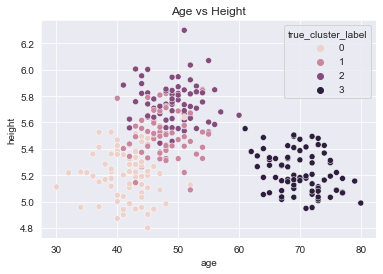

In [3]:
df=pd.read_csv('age_height_data.csv')
sns.set_style('darkgrid')
sns.scatterplot(data=df,x='age',y='height',hue='true_cluster_label')
plt.title('Age vs Height')

## Question 2 (10 Marks)

There are 4 true clusters in the data.  Create a K-means pipeline using sklearn's `KMeans` with `n_clusters=4`.  Predict on the data and plot the data according to the predicted cluster label.

<AxesSubplot:xlabel='age', ylabel='height'>

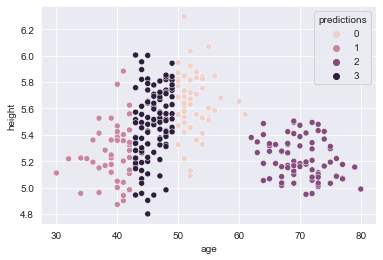

In [5]:
k_means_pipeline=Pipeline([('k_means',KMeans(n_clusters=4))])
X=df[['age','height']]
df['predictions']=k_means_pipeline.fit_predict(X)
sns.scatterplot(data=df,x='age',y='height',hue='predictions')

Question 3 (20 Marks)

You should see that the left most blob is clustered in a way that the decision line between two clusters is nearly vertical.  Does this look like the true cluster labels?  If not, what might explain this?  **Hint**: How is age measured?  How is height measured?  Are they comparable scales?

Write your answer below.

Answer here: No it does not look like a true cluster label. Looking at the data itself, height has a minimum value of 4"8 and mamximum of 6"3 while age can take from any value between 30 and 80. The range between height is 1.6 while for age is 50. Since these values are not standardized, the scale used to calculate the k-means are skewed toward age since it has a bigger range and makes vertical decision line as you can see on the scatterplot. To fix this, it needs some sort of scaler to reduce the skewing of the data toward age.

## Question 4 (20 Marks)

Add a `StandardScaler` to your pipeline and create the plot again.  Comment on if the scaling helped the clustering in so far as the predicted clusters look more like the true clusters.

<AxesSubplot:xlabel='age', ylabel='height'>

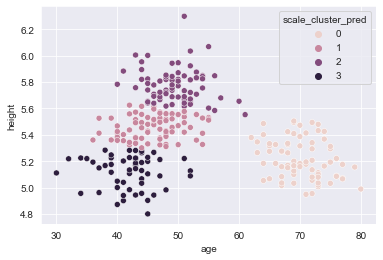

In [7]:
k_means_scaler_pipeline = Pipeline([('standard_scaler', StandardScaler()),
                                    ('k_means', KMeans(n_clusters=4))])

df["scale_cluster_pred"] = k_means_scaler_pipeline.fit_predict(X)
sns.scatterplot(data=df,x="age",y="height",hue="scale_cluster_pred")

## Question 5 (20 Marks)

In applied clustering, we never know how many clusters exist in the data.  That is something we have to decide.  One method used to determine the number of clusters is to use an elbow plot.

An elbow plot is made by fitting the clustering algorithm for a variety of cluster sizes (usually between 2 and $\sqrt{N}$ clusters, where $N$ is the number of rows in the data.  Each time we fit the clustering algorithm with a different number of clusters, we record the value of the objective function for the algorithm (in sklearn's `KMeans`, this can be done by calling `Kmeans.score`).  The number of clusters is determined by looking for an "elbow" in the data; a point where the algorithm's objective function stops decreasing quickly with additional numbers of clusters.

Hint: If you have a pipeline with a clustering step called `kmeans` in it, you can change the number of clusters, do a new fit, and get the score like so:

```
# Suppose clusters is desired number of clusters,
# and your pipeline is called kmn_pipe, which has
# a k-means step called kmeans:
kmn_pipe.named_steps['kmeans'].set_params(n_clusters = clusters)
kmn_pipe.fit(X)
newscore = (-kmn_pipe.score(X))
```

Create an elbow plot for this data.

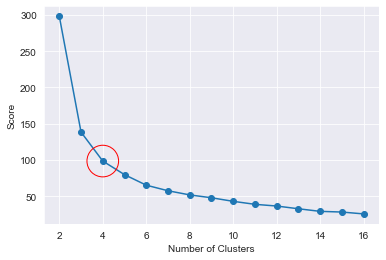

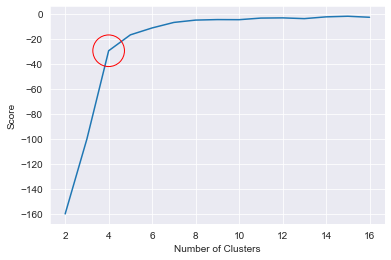

In [14]:
clus_scores,clus_clus=[],[]
cluster_pipeline=Pipeline([('standard_scaler',StandardScaler()),('k_means',KMeans(n_clusters=4))])

for i in range(2,round(len(X)**0.5)):
    cluster_pipeline.named_steps['k_means'].set_params(n_clusters=i)
    cluster_pipeline.fit(X)
    clus_clus.append(i)
    clus_scores.append(-cluster_pipeline.score(X))
fig, ax = plt.subplots()
ax.plot(clus_clus, clus_scores, marker = 'o')
ax.set_xlabel("Number of Clusters")
ax.set_ylabel("Score")
ax.scatter(4, clus_scores[2], facecolor = 'None', edgecolor = 'red', zorder = 3, s = 1000)
fig, ax = plt.subplots()
plt.plot(clus_clus, np.gradient(clus_scores))
ax.set_xlabel("Number of Clusters")
ax.set_ylabel("Score")
ax.scatter(4, np.gradient(clus_scores)[2], facecolor = 'None', edgecolor = 'red', zorder = 3, s = 1000)

## Question 6 (20 Marks)

Where is the "elbow" for this data?  Justify your answer.  Pretend as if you didn't know there were really 4 clusters in the data.

Answer here!
The elbow in the data is when the number of cluster is 4. Before cluster of 4 there is a massive magnitude change in the slope while after 4, the slope became very insignifcant where addtional cluster doesn't yield a better result which is a waste to the computational power.